<a href="https://colab.research.google.com/github/erandiranthilake/Assigment_02/blob/main/ranthilake_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd

In [31]:
np.random.seed(99)
x_train = np.random.uniform(0.0, 1.0, size = 10)
x_test = np.random.uniform(0.0, 1.0, size = 10)
x_normal = np.linspace(0, 1, num=100)
N = np.random.normal(0, 1, 10)


In [32]:
y_train = []
y_test = []
y_normal = []
for i in range (10):
  y_train.append(math.sin(2*math.pi*x_train[i]) + 0.1 * N[i]) 
  y_test.append(math.sin(2*math.pi*x_test[i]) + 0.1 * N[i]) 

for i in range (100):
  y_normal.append(math.sin(2*math.pi*x_normal[i]))


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

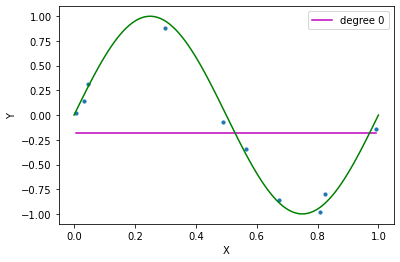

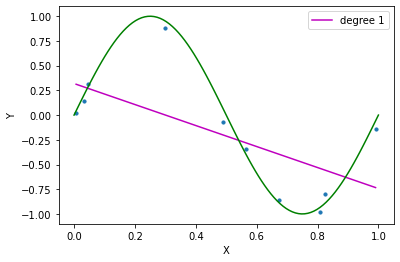

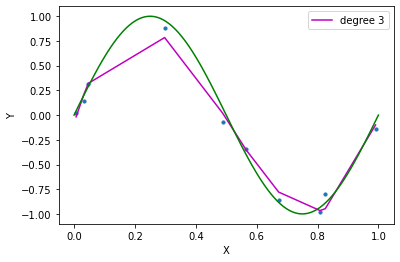

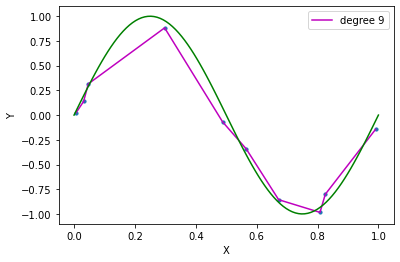

In [34]:
degrees = [0,1,3,9]

for degree in degrees:
  x = x_train[:, np.newaxis]

  y_train = np.array(y_train)
  y = y_train[:, np.newaxis]

  polynomial_features= PolynomialFeatures(degree=degree)
  x_poly = polynomial_features.fit_transform(x)

  model = LinearRegression()
  model.fit(x_poly, y)

  y_train_pred = model.predict(x_poly)

  plt.scatter(x, y, s=10)
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
  x, y_poly_pred = zip(*sorted_zip)
  plt.plot(x, y_poly_pred, label = 'degree '+str(degree), color='m', )
  plt.plot(x_normal, y_normal, color='g')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(loc='upper right')
  plt.show()


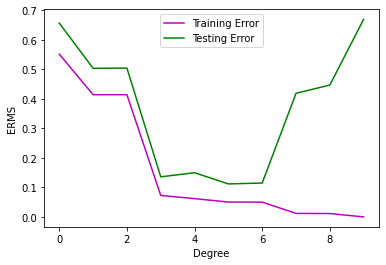

In [35]:
degrees = [0,1,2,3,4,5,6,7,8,9]
rmse_train = []
rmse_test = []
r2 = []

for degree in degrees:
  x = x_train[:, np.newaxis]
  x_t = x_test[:, np.newaxis]

  y_train = np.array(y_train)
  y_test = np.array(y_test)
  y = y_train[:, np.newaxis]
  y_t = y_test[:, np.newaxis]

  polynomial_features= PolynomialFeatures(degree=degree)
  x_poly = polynomial_features.fit_transform(x)
  x_poly_t = polynomial_features.fit_transform(x_t)

  model = LinearRegression()
  model.fit(x_poly, y)

  y_train_pred = model.predict(x_poly)
  y_test_pred = model.predict(x_poly_t)

  rmse_train.append(np.sqrt(mean_squared_error(y,y_train_pred)))
  rmse_test.append(np.sqrt(mean_squared_error(y_t,y_test_pred)))
  r2.append(r2_score(y,y_test_pred))

plt.plot(degrees, rmse_train, color='m', label='Training Error')
plt.plot(degrees, rmse_test, color='g', label='Testing Error')
plt.xlabel('Degree')
plt.ylabel('ERMS')
plt.legend(loc='upper center')
plt.show()



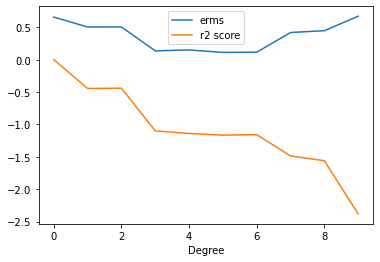

In [36]:
plt.plot(degrees, rmse_test, label='erms')
plt.plot(degrees, r2, label='r2 score')
plt.xlabel('Degree')
plt.legend(loc='upper center')

plt.show()

In [37]:
np.random.seed(99)
x_train_big = np.random.uniform(0.0, 1.0, size = 100)
N_big = np.random.normal(0, 1, 100)

y_train_big = []

for i in range (100):
  y_train_big.append(math.sin(2*math.pi*x_train_big[i]) + 0.1 * N_big[i]) 


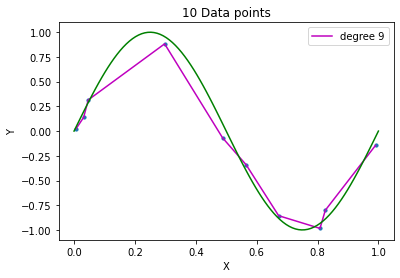

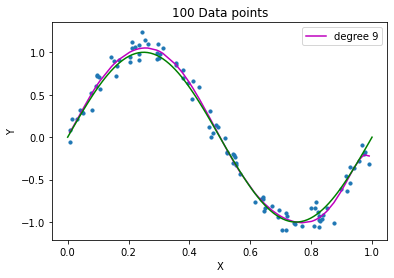

In [38]:
x = x_train[:, np.newaxis]

y_train = np.array(y_train)
y = y_train[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=degree)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_train_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, label = 'degree '+str(degree), color='m', )
plt.plot(x_normal, y_normal, color='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')
plt.title('10 Data points')
plt.show()


x = x_train_big[:, np.newaxis]
y_train_big = np.array(y_train_big)
y = y_train_big[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=9)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_train_pred = model.predict(x_poly)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m', label = 'degree 9')
plt.plot(x_normal, y_normal, color='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper right')
plt.title('100 Data points')
plt.show()

In [39]:
from sklearn.linear_model import Ridge

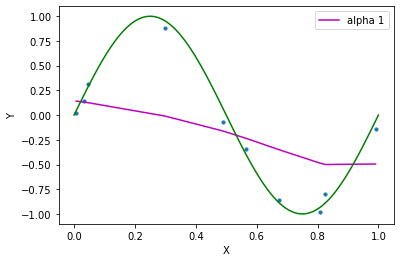

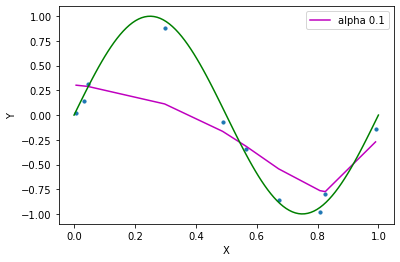

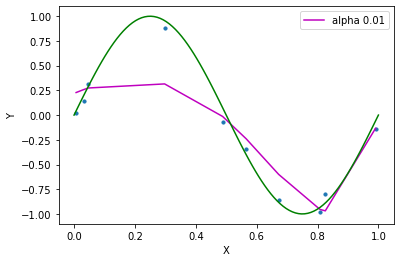

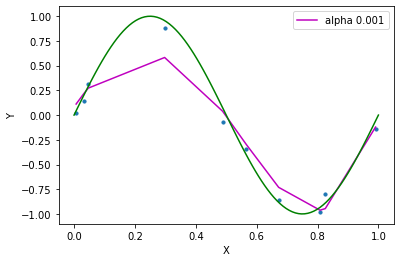

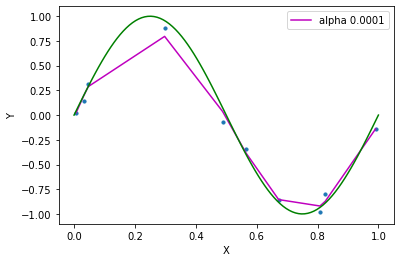

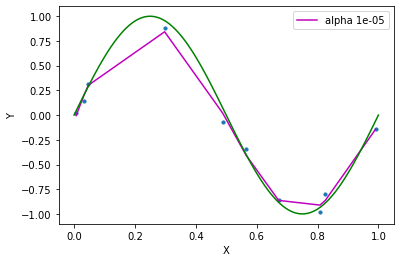

In [40]:
degrees = [0,1,3,9]
alphas = [1,0.1,0.01,0.001, 0.0001, 0.00001]

for alpha in alphas:
  x = x_train[:, np.newaxis]

  y_train = np.array(y_train)
  y = y_train[:, np.newaxis]

  polynomial_features= PolynomialFeatures(degree=9)
  x_poly = polynomial_features.fit_transform(x)

  ridge = Ridge(alpha=alpha)
  ridge.fit(x_poly, y)

  y_train_pred = ridge.predict(x_poly)

  plt.scatter(x, y, s=10)
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
  x, y_poly_pred = zip(*sorted_zip)
  plt.plot(x, y_poly_pred, color='m', label='alpha '+str(alpha) )
  plt.plot(x_normal, y_normal, color='g')
  plt.legend(loc='upper right')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

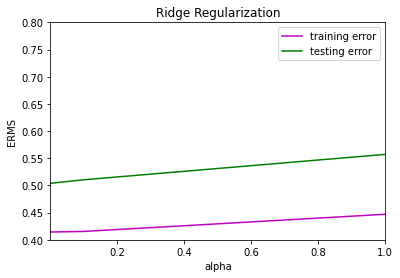

In [41]:
degrees = [1,0.1,0.01,0.001,0.0001,0.00001]
rmse_train = []
rmse_test = []

for degree in degrees:
  x = x_train[:, np.newaxis]
  x_t = x_test[:, np.newaxis]

  y_train = np.array(y_train)
  y_test = np.array(y_test)
  y = y_train[:, np.newaxis]
  y_t = y_test[:, np.newaxis]

  ridge = Ridge(alpha=degree)
  ridge.fit(x, y)

  y_train_pred = ridge.predict(x)
  y_test_pred = ridge.predict(x_t)

  rmse_train.append(np.sqrt(mean_squared_error(y,y_train_pred)))
  rmse_test.append(np.sqrt(mean_squared_error(y_t,y_test_pred)))


plt.plot(degrees, rmse_train, color='m', label ='training error')
plt.plot(degrees, rmse_test, color='g', label ='testing error')
plt.ylim([0.4, 0.8])
plt.xlim([0.00001, 1])
plt.xlabel('alpha')
plt.ylabel('ERMS')
plt.legend(loc='upper right')
plt.title('Ridge Regularization')
plt.show()

In [42]:
from sklearn.linear_model import Lasso

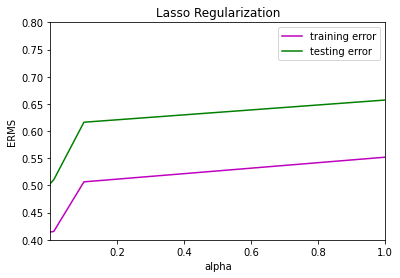

In [43]:
degrees = [1,0.1,0.01,0.001,0.0001,0.00001]
rmse_train = []
rmse_test = []

for degree in degrees:
  x = x_train[:, np.newaxis]
  x_t = x_test[:, np.newaxis]

  y_train = np.array(y_train)
  y_test = np.array(y_test)
  y = y_train[:, np.newaxis]
  y_t = y_test[:, np.newaxis]

  lasso = Lasso(alpha=degree)
  lasso.fit(x, y)

  y_train_pred = lasso.predict(x)
  y_test_pred = lasso.predict(x_t)

  rmse_train.append(np.sqrt(mean_squared_error(y,y_train_pred)))
  rmse_test.append(np.sqrt(mean_squared_error(y_t,y_test_pred)))


plt.plot(degrees, rmse_train, color='m', label ='training error')
plt.plot(degrees, rmse_test, color='g', label ='testing error')
plt.ylim([0.4, 0.8])
plt.xlim([0.00001, 1])
plt.xlabel('alpha')
plt.ylabel('ERMS')
plt.legend(loc='upper right')
plt.title('Lasso Regularization')
plt.show()